<a href="https://colab.research.google.com/github/enerhy/Portfolio/blob/master/Porto_Seguro_v2_wip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INTRO

# THEORY











## Evaluation Metrics


### Threshold Metrics for Imbalanced Classification
*   **Accuracy** = Correct Predictions / Total Predictions
*   **Error** = Incorrect Predictions / Total Predictions

Usually the majority class is reffered to as negarive (Majority = 0, Minority = 1). The confusion matrix is then:

```
               | Positive Prediction | Negative Prediction
Positive Class | True Positive (TP)  | False Negative (FN)
Negative Class | False Positive (FP) | True Negative (TN)
```
There are two groups of metrics that may be useful for imbalanced classification because they focus on one class:
*   **Sensitivity** = TruePositive / (TruePositive + FalseNegative)
*   **Specificity** = TrueNegative / (FalsePositive + TrueNegative)
*   **G-Mean** = sqrt(Sensitivity * Specificity)

**Precision-Recall Metrics:**

Precision summarizes the fraction of examples assigned the positive class that belong to the positive class.
*   **Precision** = TruePositive / (TruePositive + FalsePositive)

Recall summarizes how well the positive class was predicted and is the same calculation as sensitivity.
*   **Recall** = TruePositive / (TruePositive + FalseNegative)

Precision and recall can be combined into a single score that seeks to balance both concerns, called the F-score or the F-measure.

*   **F-Measure** = (2 * Precision * Recall) / (Precision + Recall)
*   List item

*An important disadvantage of all the threshold metrics discussed in the previous section is that they assume full knowledge of the conditions under which the classifier will be deployed. In particular, they assume that the class imbalance present in the training set is the one that will be encountered throughout the operating life of the classifier*

### Ranking Metrics for Imbalanced Classification
Rank metrics are more concerned with evaluating classifiers based on how effective they are at separating classes.

These metrics require that a classifier predicts a score or a probability of class membership. From this score, different thresholds can be applied to test the effectiveness of classifiers. Those models that maintain a good score across a range of thresholds will have good class separation and will be ranked higher.

### A ROC curve 
is a diagnostic plot for summarizing the behavior of a model by calculating the false positive rate and true positive rate for a set of predictions by the model under different thresholds.

The true positive rate is the recall or sensitivity.

*   **TruePositiveRate** = TruePositive / (TruePositive + FalseNegative)

The false positive rate is calculated as:
*   **FalsePositiveRate** = FalsePositive / (FalsePositive + TrueNegative)

![ROC Curve](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/10/Depiction-of-a-ROC-Curve.jpg)


### Precision-Recall Curve
This metrics focuses on the performance of the minority class. Thus it is more appropriate for imbalanced classification problems.

*   **PR AUC** = Precision-Recall Area Under Curve

![PR AUC CURVE](https://www.researchgate.net/profile/Davide_Chicco/publication/321672019/figure/fig1/AS:614279602511886@1523467078452/a-Example-of-Precision-Recall-curve-with-the-precision-score-on-the-y-axis-and-the.png)


### Probabilistic Metrics for Imbalanced Classification
Probabilistic metrics are designed specifically to quantify the uncertainty in a classifier’s predictions.

Metrics based on a probabilistic understanding of error, i.e. measuring the deviation from the true probability […] These measures are especially useful when we want an assessment of the reliability of the classifiers, not only measuring when they fail but whether they have selected the wrong class with a high or low probability.

Evaluating a model based on the predicted probabilities requires that the probabilities are calibrated.

Some classifiers are trained using a probabilistic framework, such as maximum likelihood estimation, meaning that their probabilities are already calibrated. An example would be logistic regression. Perhaps the most common metric for evaluating predicted probabilities is log loss for binary classification (or the negative log likelihood), or known more generally as **cross-entropy**.

*   **BrierScore** = 1/N * Sum i to N (yhat_i – y_i)^2

The benefit of the Brier score is that it is focused on the positive class, which for imbalanced classification is the minority class. This makes it more preferable than log loss, which is focused on the entire probability distribution.

The Brier score is calculated as the mean squared error between the expected probabilities for the positive class (e.g. 1.0) and the predicted probabilities.

The differences in Brier score for different classifiers can be very small. In order to address this problem, the score can be scaled against a reference score, such as the score from a no skill classifier (e.g. predicting the probability distribution of the positive class in the training dataset).

*   **BrierSkillScore** = 1 – (BrierScore / BrierScore_ref)






### How to choose an evaluation metrics
*   Talk to the stakeholder
*   Take a look and how the other evaluate similar problems
*   Perform tests to observe results and see wheter it maches expectations


---


![alt text](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/12/How-to-Choose-a-Metric-for-Imbalanced-Classification-latest.png)

# Imports and Set-Up

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
cd /content/drive/My Drive/Colab Notebooks/Insurance_porto_seguro

/content/drive/My Drive/Colab Notebooks/Insurance_porto_seguro


In [0]:
!ls

Insurance_v1.ipynb			 StratifiedKFold_v2.csv
Insurance_v2.ipynb			 test.csv
nearest_miss_resampled_train.csv	 train.csv
sample_submission.csv			 xgb_model.joblib.dat
StratifiedKFold_cluster_resample_v1.csv  xgb_model.model
StratifiedKFold.csv			 xgb_model.pickle.dat
StratifiedKFold_SMOTE_resample_v1.csv


In [0]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

import time

random_state = 6
np.random.seed(random_state)
warnings.filterwarnings('ignore')

In [0]:
%matplotlib inline

In [0]:
df_train = pd.read_csv('train.csv', na_values=-1)
df_test = pd.read_csv('test.csv', na_values=-1)

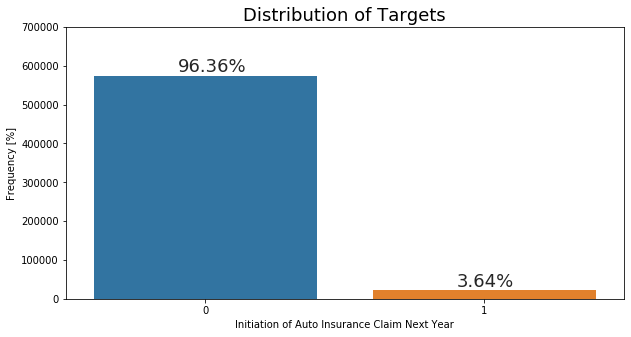

In [0]:
# Check the Target Value Balance
ax = sns.countplot(x='target', data=df_train)
sns.set(font_scale=1.5)
ax.set_xlabel(' ')
ax.set_ylabel(' ')
fig = plt.gcf()
fig.set_size_inches(10,5)
ax.set_ylim(top=700000)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(100*p.get_height()/len(df_train.target)), (p.get_x()+ 0.3, p.get_height()+10000))

plt.title('Distribution of Targets')
plt.xlabel('Initiation of Auto Insurance Claim Next Year')
plt.ylabel('Frequency [%]')
plt.show()

In [0]:
df_train.isnull().mean().sort_values(ascending=False).head(15)

ps_car_03_cat    0.690898
ps_car_05_cat    0.447825
ps_reg_03        0.181065
ps_car_14        0.071605
ps_car_07_cat    0.019302
ps_ind_05_cat    0.009760
ps_car_09_cat    0.000956
ps_ind_02_cat    0.000363
ps_car_01_cat    0.000180
ps_ind_04_cat    0.000139
ps_car_02_cat    0.000008
ps_car_11        0.000008
ps_car_12        0.000002
ps_ind_03        0.000000
ps_ind_18_bin    0.000000
dtype: float64

In [0]:
print('Training data shape: {}'.format(df_train.shape))
print('Training data shape: {}'.format(df_test.shape))

Training data shape: (595212, 59)
Training data shape: (892816, 58)


In [0]:
def get_missing_features(df):
    missings = pd.DataFrame([], columns=['feature', 'no_recoreds', 'percentage'])
    total_rows = df.shape[0]
    index = 0
    for feature in list(df):
        total_nulls = df[feature].isnull().sum()
        if total_nulls > 0:
            missings_perc = total_nulls / total_rows
            missings.loc[index] = [feature, total_nulls, missings_perc]
            index += 1
    missings = missings.sort_values('no_recoreds', ascending=False)
    return missings

In [0]:
df_missings = get_missing_features(df_train)
print(df_missings)

          feature no_recoreds  percentage
6   ps_car_03_cat      411231    0.690898
7   ps_car_05_cat      266551    0.447825
3       ps_reg_03      107772    0.181065
12      ps_car_14       42620    0.071605
8   ps_car_07_cat       11489    0.019302
2   ps_ind_05_cat        5809    0.009760
9   ps_car_09_cat         569    0.000956
0   ps_ind_02_cat         216    0.000363
4   ps_car_01_cat         107    0.000180
1   ps_ind_04_cat          83    0.000139
5   ps_car_02_cat           5    0.000008
10      ps_car_11           5    0.000008
11      ps_car_12           1    0.000002


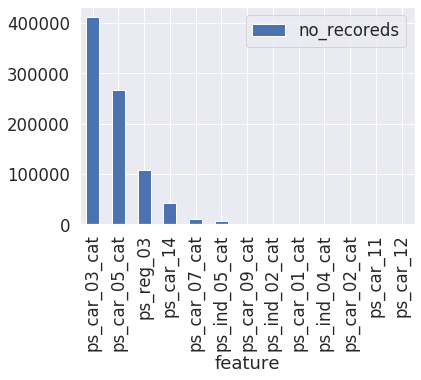

In [0]:
df_missings.plot(x='feature', y='no_recoreds', kind='bar', )


## Missing Values

In [0]:
list(df_train.drop(['id'], axis=1))

['target',
 'ps_ind_01',
 'ps_ind_02_cat',
 'ps_ind_03',
 'ps_ind_04_cat',
 'ps_ind_05_cat',
 'ps_ind_06_bin',
 'ps_ind_07_bin',
 'ps_ind_08_bin',
 'ps_ind_09_bin',
 'ps_ind_10_bin',
 'ps_ind_11_bin',
 'ps_ind_12_bin',
 'ps_ind_13_bin',
 'ps_ind_14',
 'ps_ind_15',
 'ps_ind_16_bin',
 'ps_ind_17_bin',
 'ps_ind_18_bin',
 'ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_01_cat',
 'ps_car_02_cat',
 'ps_car_03_cat',
 'ps_car_04_cat',
 'ps_car_05_cat',
 'ps_car_06_cat',
 'ps_car_07_cat',
 'ps_car_08_cat',
 'ps_car_09_cat',
 'ps_car_10_cat',
 'ps_car_11_cat',
 'ps_car_11',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03',
 'ps_calc_04',
 'ps_calc_05',
 'ps_calc_06',
 'ps_calc_07',
 'ps_calc_08',
 'ps_calc_09',
 'ps_calc_10',
 'ps_calc_11',
 'ps_calc_12',
 'ps_calc_13',
 'ps_calc_14',
 'ps_calc_15_bin',
 'ps_calc_16_bin',
 'ps_calc_17_bin',
 'ps_calc_18_bin',
 'ps_calc_19_bin',
 'ps_calc_20_bin']

In [0]:
for feature in list(df_train.drop(['id'], axis=1)):
    if df_train[feature].isnull().sum() > 0:
        df_train[feature].fillna(df_train[feature].mode()[0],inplace=True)

for feature in list(df_test.drop(['id'], axis=1)):
    if df_test[feature].isnull().sum() > 0:
        df_test[feature].fillna(df_train[feature].mode()[0],inplace=True)

In [0]:
get_missing_features(df_train)

,feature,no_recoreds,percentage


In [0]:
df_train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_14,ps_ind_15,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_01_cat,ps_car_02_cat,ps_car_03_cat,ps_car_04_cat,ps_car_05_cat,ps_car_06_cat,ps_car_07_cat,ps_car_08_cat,ps_car_09_cat,ps_car_10_cat,ps_car_11_cat,ps_car_11,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03,ps_calc_04,ps_calc_05,ps_calc_06,ps_calc_07,ps_calc_08,ps_calc_09,ps_calc_10,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2.0,5,1.0,0.0,0,1,0,0,0,0,0,0,0,11,0,1,0,0.7,0.2,0.718070,10.0,1.0,1.0,0,1.0,4,1.0,0,0.0,1,12,2.0,0.400000,0.883679,0.370810,3.605551,0.6,0.5,0.2,3,1,10,1,10,1,5,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1.0,7,0.0,0.0,0,0,1,0,0,0,0,0,0,3,0,0,1,0.8,0.4,0.766078,11.0,1.0,1.0,0,1.0,11,1.0,1,2.0,1,19,3.0,0.316228,0.618817,0.388716,2.449490,0.3,0.1,0.3,2,1,9,5,8,1,7,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4.0,9,1.0,0.0,0,0,1,0,0,0,0,0,0,12,1,0,0,0.0,0.0,0.633936,7.0,1.0,1.0,0,1.0,14,1.0,1,2.0,1,60,1.0,0.316228,0.641586,0.347275,3.316625,0.5,0.7,0.1,2,2,9,1,8,2,7,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1.0,2,0.0,0.0,1,0,0,0,0,0,0,0,0,8,1,0,0,0.9,0.2,0.580948,7.0,1.0,0.0,0,1.0,11,1.0,1,3.0,1,104,1.0,0.374166,0.542949,0.294958,2.000000,0.6,0.9,0.1,2,4,7,1,8,4,2,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2.0,0,1.0,0.0,1,0,0,0,0,0,0,0,0,9,1,0,0,0.7,0.6,0.840759,11.0,1.0,1.0,0,1.0,14,1.0,1,2.0,1,82,3.0,0.316070,0.565832,0.365103,2.000000,0.4,0.6,0.0,2,2,6,3,10,2,12,3,1,1,3,0,0,0,1,1,0


## Gini Definition

In [0]:
# Onother gini deffinition
# Define the gini metric - from https://www.kaggle.com/c/ClaimPredictionChallenge/discussion/703#5897
def gini(actual, pred, cmpcol = 0, sortcol = 1):
    assert( len(actual) == len(pred) )
    all = np.asarray(np.c_[ actual, pred, np.arange(len(actual)) ], dtype=np.float)
    all = all[ np.lexsort((all[:,2], -1*all[:,1])) ]
    totalLosses = all[:,0].sum()
    giniSum = all[:,0].cumsum().sum() / totalLosses
    
    giniSum -= (len(actual) + 1) / 2.
    return giniSum / len(actual)
 
def gini_normalized(a, p):
    return gini(a, p) / gini(a, a)

def gini_xgb(preds, dtrain):
    labels = dtrain.get_label()
    gini_score = gini_normalized(labels, preds)
    return 'gini', gini_score

In [0]:
# from https://www.kaggle.com/mashavasilenko/porto-seguro-xgb-modeling-and-parameters-tuning

# def eval_gini(y_true, y_prob):
#     y_true = np.asarray(y_true)
#     y_true = y_true[np.argsort(y_prob)]
#     ntrue = 0
#     gini = 0
#     delta = 0
#     n = len(y_true)
#     for i in range(n-1, -1, -1):
#         y_i = y_true[i]
#         ntrue += y_i
#         gini += y_i * delta
#         delta += 1 - y_i
#     gini = 1 - 2 * gini / (ntrue * (n - ntrue))
#     return gini


# def gini_xgb(preds, dtrain):
#     labels = dtrain.get_label()
#     gini_score = -eval_gini(labels, preds)
#     return [('gini', gini_score)]

# def gini_normalized(a, p):
#     return gini(a, p) / gini(a, a)

## Try with ensamble learning

---





In [0]:
'''
from sklearn.model_selection import StratifiedKFold

class Create_ensemble(object):
    def __init__(self, n_splits, base_models):
        self.n_splits = n_splits
        self.base_models = base_models

    def predict(self, X, y, T):
        X = np.array(X)
        y = np.array(y)
        T = np.array(T)

        folds = list(StratifiedKFold(n_splits=self.n_splits, shuffle=True, random_state=random_state).split(X, y))

        S_train = np.zeros((X.shape[0], len(self.base_models)))
        S_test = np.zeros((T.shape[0], len(self.base_models)))
        
        for i, clf in enumerate(self.base_models):
            S_test_i = np.zeros((T.shape[0], self.n_splits))

            for j, (train_idx, valid_idx) in enumerate(folds):
                X_train = X[train_idx]
                y_train = y[train_idx]
                X_valid = X[valid_idx]
                y_valid = y[valid_idx]
                
                clf.fit(X_train, y_train)
                valid_pred = clf.predict_proba(X_valid)[:,1]
                S_train[valid_idx, i] = valid_pred
                S_test_i[:, j] = clf.predict_proba(T)[:,1]
            
            print( "\nTraining Gini for model {} : {}".format(i, eval_gini(y, S_train[:,i])))
            S_test[:, i] = S_test_i.mean(axis=1)
            
        return S_train, S_test
'''

'\nfrom sklearn.model_selection import StratifiedKFold\n\nclass Create_ensemble(object):\n    def __init__(self, n_splits, base_models):\n        self.n_splits = n_splits\n        self.base_models = base_models\n\n    def predict(self, X, y, T):\n        X = np.array(X)\n        y = np.array(y)\n        T = np.array(T)\n\n        folds = list(StratifiedKFold(n_splits=self.n_splits, shuffle=True, random_state=random_state).split(X, y))\n\n        S_train = np.zeros((X.shape[0], len(self.base_models)))\n        S_test = np.zeros((T.shape[0], len(self.base_models)))\n        \n        for i, clf in enumerate(self.base_models):\n            S_test_i = np.zeros((T.shape[0], self.n_splits))\n\n            for j, (train_idx, valid_idx) in enumerate(folds):\n                X_train = X[train_idx]\n                y_train = y[train_idx]\n                X_valid = X[valid_idx]\n                y_valid = y[valid_idx]\n                \n                clf.fit(X_train, y_train)\n                va

In [0]:
'''
# LightGBM params
lgb_params = {}
lgb_params['learning_rate'] = 0.02
lgb_params['n_estimators'] = 700
lgb_params['max_bin'] = 15
lgb_params['subsample'] = 0.8
lgb_params['subsample_freq'] = 10
lgb_params['colsample_bytree'] = 0.8   
lgb_params['min_child_samples'] = 800
lgb_params['random_state'] = random_state
lgb_params['scale_pos_weight'] = 3

lgb_params2 = {}
lgb_params2['learning_rate'] = 0.02
lgb_params2['n_estimators'] = 900
lgb_params2['max_bin'] = 20
lgb_params2['subsample'] = 0.8
lgb_params2['subsample_freq'] = 10
lgb_params2['colsample_bytree'] = 0.8   
lgb_params2['min_child_samples'] = 600
lgb_params2['random_state'] = random_state
lgb_params2['scale_pos_weight'] = 3

lgb_model = LGBMClassifier(**lgb_params)
lgb_model2 = LGBMClassifier(**lgb_params2)
'''

In [0]:
'''
id_test = df_test['id'].values
y = df_train['target'].values

df_train = df_train.drop(['target','id'], axis = 1)
df_test = df_test.drop(['id'], axis = 1) 
'''

In [0]:
'''
lgb_stack = Create_ensemble(n_splits = 5, base_models = [lgb_model, lgb_model2])        
X = df_train
Y = y
T = df_test
lgb_train_pred, lgb_test_pred = lgb_stack.predict(X, Y, T)
'''


Training Gini for model 0 : 0.2796724853980198

Training Gini for model 1 : 0.2803904463497011


In [0]:

### Try with stratified Kfold and XGB

## Try with stratified Kfold and XGB


---







In [0]:
import xgboost as xgb

In [0]:
#Stratified KFold is used to keep the distribution of each label consistent for each training batch.
from sklearn.model_selection import StratifiedKFold

kfold = 3
skf = StratifiedKFold(n_splits=kfold, random_state=42)

In [0]:
tmp = df_train.target.value_counts()
scale_pos_weight = tmp[0]/tmp[1]
print(scale_pos_weight)

26.43671061122891


In [0]:
# Defining the hyperparameters
params = {
    'min_child_weight': 10.0,
    'objective': 'binary:logistic',
    'max_depth': 7,
    'max_delta_step': 1.8,
    'colsample_bytree': 0.4,
    'subsample': 0.8,
    'eta': 0.025,
    'gamma': 0.65,
    'num_boost_round' : 500,
    # 'scale_pos_weight' : 10, # Result of the Gridseaerch below,
    'tree_method' : 'gpu_hist'
    }

### Predictions

In [0]:
# Define X_train and y_train
X = df_train.drop(['id', 'target'], axis=1).values
y = df_train.target.values
test_id = df_test.id.values
test = df_test.drop('id', axis=1)

In [0]:
# I will incorporate different resampling techniques to try tackle the implance
# problem
# Cant take datasets with nan values!
from imblearn.under_sampling import (ClusterCentroids, RandomUnderSampler,
                                     TomekLinks,
                                     CondensedNearestNeighbour,
                                     NearMiss
                                    )
from collections import Counter

# cc = ClusterCentroids(random_state=42, ratio='majority', n_jobs=-1)
# rus = RandomUnderSampler(sampling_strategy='majority')
tl = TomekLinks(sampling_strategy='majority', n_jobs=-1, random_state=42)
# conn = CondensedNearestNeighbour(sampling_strategy='majority', n_jobs=-1)
# nm = NearMiss(sampling_strategy='majority', n_jobs=-1, random_state=42)

In [0]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

from collections import Counter

sm = SMOTE(sampling_strategy='minority', n_jobs = -1)
smt = SMOTETomek()

In [0]:
# X_res, y_res = rus.fit_resample(X, y)
# X_res, y_res = conn.fit_resample(X, y)
# X_res, y_res = smt.fit_resample(X, y)
# X_res, y_res = nm.fit_resample(X, y)
X_res, y_res = tl.fit_resample(X, y)

In [0]:
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 21694, 1: 21694})


In [0]:
x_res_df = pd.DataFrame(X_res) 
y_res_df = pd.DataFrame(y_res)
train_res_df = pd.concat((x_res_df,y_res_df), axis=1)

In [0]:
train_res_df.to_csv('nearest_miss_resampled_train.csv')

In [0]:
# Create a sumbission file
sub = pd.DataFrame()
sub['id'] = test_id
sub['target'] = np.zeros_like(test_id)

In [0]:
# Stratified Kfold Prediction
for i, (train_index, test_index) in enumerate(skf.split(X_res, y_res)):
    print('[Fold %d/%d]' % (i + 1, kfold))
    X_train, X_valid = X_res[train_index], X_res[test_index]
    y_train, y_valid = y_res[train_index], y_res[test_index]
    
    # Convert our data into XGBoost format
    d_train = xgb.DMatrix(X_train, y_train)
    d_valid = xgb.DMatrix(X_valid, y_valid)
    d_test = xgb.DMatrix(test.values)
    watchlist = [(d_train, 'train'), (d_valid, 'valid')]

    # Train the model! We pass in a max of 400 rounds (with early stopping after 70)
    # and the custom metric (maximize=True tells xgb that higher metric is better)
    mdl = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=70, feval=gini_xgb, maximize=True, verbose_eval=50)

    print('[Fold %d/%d Prediciton:]' % (i + 1, kfold))
    # Predict on our test data
    p_test = mdl.predict(d_test, ntree_limit=mdl.best_ntree_limit)
    sub['target'] += p_test/kfold


mdl.save_model('xgb_model.model')
sub.to_csv('StratifiedKFold_cluster_resample_v1.csv', index=False)

[Fold 1/3]
[0]	train-error:0.262264	valid-error:0.234184	train-gini:0.542116	valid-gini:0.605305
Multiple eval metrics have been passed: 'valid-gini' will be used for early stopping.

Will train until valid-gini hasn't improved in 70 rounds.
[50]	train-error:0.17414	valid-error:0.156883	train-gini:0.798082	valid-gini:0.846298
[100]	train-error:0.159412	valid-error:0.144161	train-gini:0.83069	valid-gini:0.87218
[150]	train-error:0.144028	valid-error:0.130817	train-gini:0.856285	valid-gini:0.892296
[200]	train-error:0.132066	valid-error:0.124386	train-gini:0.871949	valid-gini:0.902696
[250]	train-error:0.12363	valid-error:0.118717	train-gini:0.883776	valid-gini:0.911075
[300]	train-error:0.116543	valid-error:0.115605	train-gini:0.89253	valid-gini:0.916142
[350]	train-error:0.11115	valid-error:0.112909	train-gini:0.89916	valid-gini:0.919864
[399]	train-error:0.106655	valid-error:0.10959	train-gini:0.904639	valid-gini:0.922396
[Fold 1/3 Prediciton:]
[Fold 2/3]
[0]	train-error:0.252169	vali

In [0]:
# sub.to_csv('StratifiedKFold_v2.csv', index=False)

In [0]:
# mdl.save_model('xgb_model.model')

In [0]:
!pip install joblib

In [0]:
from joblib import dump
from joblib import load

In [0]:
# save model to file
dump(mdl, "xgb_model.joblib.dat")

['xgb_model.joblib.dat']

In [0]:
import pickle
pickle.dump(mdl, open("xgb_model.pickle.dat", "wb"))

### Evaluate

In [0]:
mdl = xgb.Booster({'nthread': 4})  # init model
mdl.load_model('xgb_model.model')  # load data

In [0]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [0]:
# Get the predictions
train_data = xgb.DMatrix(X, y)
p_train = mdl.predict(train_data
                      # , ntree_limit=mdl.best_ntree_limit
                      )

In [0]:
np.shape(p_train)

(595212,)

In [0]:
p_train

array([0.9781773 , 0.7990536 , 0.9722515 , ..., 0.6769186 , 0.87357366,
       0.80261695], dtype=float32)

In [0]:
predictions_train = np.zeros(len(y))

In [0]:
np.shape(predictions_train)

(595212,)

In [0]:
predictions_train = np.zeros(len(y))
for i in range(len(predictions_train)):
  if p_train[i] >= 0.5:
    predictions_train[i] = 1 

In [0]:
np.sum(predictions_train)

479067.0

In [0]:


print('Train Set auc: {}'.format(roc_auc_score(y, p_train)))
print('Train Set accuracy: {}'.format(accuracy_score(y, predictions_train)))
print()

print('')
print('Train Set Confusion matrix:')
print(confusion_matrix(y, predictions_train))



Train Set auc: 0.5726974055353509
Train Set accuracy: 0.22193940982372667


Train Set Confusion matrix:
[[113276 460242]
 [  2869  18825]]


## XGB Classifier with Stratified Kfold and Gridsearch for the best pos_scale

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [0]:
clf = xgb.XGBClassifier(
    min_child_weight = 10.0,
    objective= 'binary:logistic',
    max_depth = 10,
    max_delta_step= 1.8,
    colsample_bytree=0.4,
    subsample=0.8,
    eta=0.025,
    gamma=0.65,
    num_boost_round=500,
    nthread = -1,
    tree_method = 'gpu_hist'
)

In [0]:
param_grid = {
    'scale_pos_weight' : [10, 20, scale_pos_weight, 40]
}

In [0]:
cv = RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=0)

In [0]:
grid_search_xgb = GridSearchCV(clf, param_grid=param_grid, scoring='roc_auc', verbose=100)
grid_result = grid_search_xgb.fit(X=X, y=y)
grid_result.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] scale_pos_weight=10 .............................................
[CV] ................. scale_pos_weight=10, score=0.608, total=   6.7s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    6.7s remaining:    0.0s
[CV] scale_pos_weight=10 .............................................
[CV] ................. scale_pos_weight=10, score=0.605, total=   6.5s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   13.2s remaining:    0.0s
[CV] scale_pos_weight=10 .............................................
[CV] ................. scale_pos_weight=10, score=0.606, total=   6.5s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   19.8s remaining:    0.0s
[CV] scale_pos_weight=10 .............................................
[CV] ................. scale_pos_weight=10, score=0.614, total=   6.5s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed

{'scale_pos_weight': 10}

In [0]:
grid_search_xgb.best_params_

{'scale_pos_weight': 10}

# QUESTIONS



*   Why stratified Kfold is better than just training with more iterations or ensample different models?



# ToDos


*   Try with balancing techniques
*   Examine and try different hyperparameters
